XOR - Introduction to Neural Networks 
=======================================
### The basics of neural networks
Traditionally, programs need to be hard coded with whatever you want it to do. If they are programmed using extensive techniques and painstakingly adjusted, they may be able to cover for a majority of situations, or at least enough to complete the necessary tasks. However, ***neural networks*** are a type of algorithm that's capable of learning. Well, kinda. Let me explain..

Neural networks are a type of program that are based on, very loosely, a human neuron. All you really need to know about a neuron, without turning this into a bio lesson, is that there is an input area, a processing area in that carries information which connects the output of one neuron to the input of another - known as synapses - and an output area. These branch off and connect with many other neurons, passing information from the brain and back. Millions of these neural connections exist throughout our bodies, collectively referred to as ***neural networks***.


![human neuron gif](Documents/neuron.gif "Neuron - Via GIPHY")


Now that we've discussed real neural networks, we can start looking at ***artificial neural networks***. Like the biological kind, an artificial neural network has <u>inputs</u>, a <u>processing area</u> that transmits information, and <u>outputs</u>. However, these are much simpler, in both design and in function, and nowhere near as powerful as the real kind.


Here is a diagram of a basic artificial neuron:

![basic neuron](Documents/basicNN.png "Basic Neuron")


This is an example of a simple 3-input, 1-output neural network. As we talked about, each of the neurons has an input, $i_n$, a connection to the next neuron layer, called a ***synapse***, which carries a weight $w_n$, and an output layer. In this case, there is only one output.

The easiest way to understand what's taking place is to think of it like this: by multiplying two numbers together, you can theoretically get any number.

The two numbers in this case are the input and the synaptic weight. The number we are trying to get is the output.
Since the starting synaptic weight is random, it is highly likely the network will need to do some adjusting, or as I like to call it, learning, before it reaches the correct output.

The basic idea is to take the input, multiply it by the synaptic weight, and check if the output is correct. If it is not, adjust the weight, multiply it by the input again, check the output and repeat, until we have reached an ideal synaptic weight.


### What is XOR?
-------------------------------
An XOR gate is a kind of logic gate. It is a very simple example of a specific combination of inputs causing an output. Here it is below, we won't get into too many details as you really only need to know the way it works.

|Input 1|Input 2||Output|
|:--------:|:--------:||:-----:|
| 0        | 0        || OFF|
| 0        | 1        || ON |
| 1        | 0        || ON |
| 1        | 1        || OFF |

The pattern here is that if both inputs are the same, the output is off, and if both inputs are different, the output is on.


### Getting into the details
--------------------------------------
Let's look at it using some raw numbers.

Remember how I said the main idea is that you want to multiply the inputs by the right numbers to get the output?

We'll give our inputs, which is either 0 or 1, and they both will be multiplied by the synaptic weight. We'll adjust it until we get an accurate output each time, and we're confident the neural network has learned the pattern.

In order to do that, all elements have to be numbers. So we'll assign a number to each output, 0 for off, 1 for on. (This is called ***classification***, or specifically, ***binary classification***, but more on that in another post).

So to write this out in math terms, it's the sum of all the inputs multiplied by their synaptic weights. Here's the equation:


$$(i_1 \cdot w_1) + (i_2 \cdot w_2) + (i_n \cdot w_n) ...$$


Which is, in broader terms:


$$\sum i_n \cdot w_n$$

The outputs can also be represented as the dot product of the inputs and the synaptic weights:

$$
    \begin{bmatrix}
       i_a & i_b \\          
       i_c & i_d \\
       i_e & i_f \\
       i_g & i_h
     \end{bmatrix}
     \cdot
      \begin{bmatrix}
       w_1 \\
       w_2
     \end{bmatrix}
     \longrightarrow
     \begin{bmatrix}
        i_a w_1 + i_b w_2 \\
        i_c w_1 + i_d w_2 \\
        i_e w_1 + i_f w_2 \\
        i_g w_1 + i_h w_2
     \end{bmatrix}
     =
     \begin{bmatrix}
        o_{ab} \\
        o_{cd} \\
        o_{ef} \\
        o_{gh}
     \end{bmatrix}
$$

Where $i$ is the first and second input, $w$ are the synaptic weights, and $o$ is the output for those specific inputs.

Don't lose me with the symbols. Let's go back to our problem of XOR so I can explain with an actual example. So, we have our inputs and outputs, which we will train the neural network on. Take a look at the updated XOR:

|Input 1|Input 2||Output|
|:--------:|:--------:||:-----:|
| 0        | 0        || 0  (OFF)|
| 0        | 1        || 1  (ON) |
| 1        | 0        || 1  (ON) |
| 1        | 1        || 0  (OFF) |

Or, depicted in matrix form here:

$$
    \begin{bmatrix}
       0 & 0 \\          
       0 & 1 \\
       1 & 0 \\
       1 & 1
     \end{bmatrix}
      =
      \begin{bmatrix}
       0 \\
       1 \\
       1 \\
       0
     \end{bmatrix}
$$


So now that we have our data, let's plug it into our neural network. We'll use the diagram above. For the first "ON" data set [0, 1] = [1], this is what it should look like:

![network with inputs and outputs](Documents/inputNN.png "Network with inputs and output")

Our neural network needs to find the correct synaptic weights which will allow it to make the right prediction. We can just follow the equation. That is:

$$\sum i_n \cdot w_n = (0 \cdot w_1) + (0 \cdot w_2) = 0$$

We'll train it in this same way with all of the data:

$$\sum i_n \cdot w_n = (0 \cdot w_1) + (1 \cdot w_2) = 1$$
$$\sum i_n \cdot w_n = (1 \cdot w_1) + (0 \cdot w_2) = 1$$
$$\sum i_n \cdot w_n = (1 \cdot w_1) + (1 \cdot w_2) = 0$$
Let's start laying out our steps thus far:

<pre style="font-family: times; font-size:11pt; text-align: left; line-height: 1.5;">
     <strong>1:</strong> Obtain a dataset with <i>i</i> inputs and <i>o</i> outputs 
             - the neural network will have this same number of inputs and outputs.
     <strong>2:</strong> If the outputs or inputs are <i>not</i> in numerical form, replace them with numbers (in this example we used 0 and 1).
     <strong>3:</strong> Plug the input vectors into your neural network (in this example the inputs are    [0, 0], [0, 1], [1, 0], [1, 1]).
     <strong>4:</strong> Use arbitrary values for the initial synaptic weights and train the network to find the correct synaptic weights.
</pre>


### Finding the synaptic weights and understanding the sigmoid
--------------------------------------
Now that we've got our data, we're ready to start training. But the question remains, how do we obtain the correct synaptic weights?

First, we'll have to assign random weights to each synapse, just as a starting point. We then multiply our inputs times these random starting weights. 

Next, we'll need to normalize it so that the output is between 0 and 1. For our case, this is because the output is either 0 or 1. 

But in other cases, the output could be a probability, a number greater than 1, or anything else. Normalizing in this way uses something called an ***activation function***, of which there are many. 

To normalize, we simply take our $\sum i_n \cdot w_n$ and plug it in for $x$ in our activation function.

As I said, there are many different kinds of activation functions - ```tanh```, ```relu```, ```binary step``` - all of which have their own respective uses and qualities. For this example, we'll be using what's called the ***sigmoid function***.

The sigmoid function is, in math terms, 

$$\frac{1}{1 + e^{(-x)}}$$

Let's graph it and take a look at some of it's qualities, and why it's useful for us.

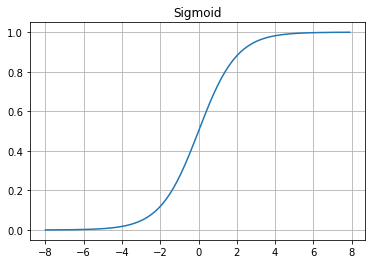

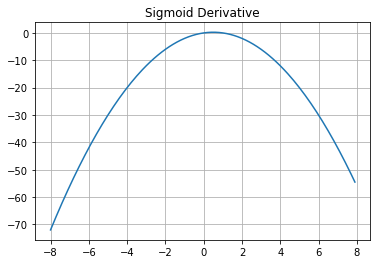

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp

#sigmoid function is 1/(1+e^(-x))
def sigmoid(x):
    #define an array a
    a = []
    for value in x:
        a.append(1/(1+exp(-value)))
    return a

#sigmoid derivative is x * (1 - x)
def sigmoid_derivative(z):
    b = []
    for value in z:
        b.append(value * (1 - value))
    return b

x = np.arange(-8., 8., 0.1)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid")
plt.grid(True)
plt.show()

z = np.arange(-8., 8., 0.1)
plt.plot(z, sigmoid_derivative(z))
plt.title("Sigmoid Derivative")
plt.grid(True)
plt.show()

The sigmoid goes from (0, 1). The further $x$ goes in the positive direction, the closer it gets to 1. The further $x$ goes in the negative direction, the closer it gets to 0. However, it doesn't ever touch 0 or 1, which is important to remember.

Like I said earlier, the random synaptic weight will most likely not give us the correct output the first try. So we need a way to adjust the synpatic weights until it starts producing accurate outputs.

Our starting inputs are 0, 0, and we to multiply them by weights that will give us our output, 0. However, since any number multiplied by 0 will give us 0, this isn't a great example. So, let's move on to the second input 0, 1 => 1.

Using a random number generator, our starting weights are $.03$ and $.2$.

Using the equation this gives us:

$$\sum i_n \cdot w_n = (0 \cdot 0.2) + (1 \cdot 0.03) = 0 + 0.03 = .03$$

Plug this into the sigmoid activation function:

$$\frac{1}{1 + e^{(-(.03))}} = .507$$

So we end up with an answer of .507, but our correct output is supposed to be 1. So how can the neural network learn from, and correct its errors?

We'll use the sigmoid derivative.

I graphed the sigmoid derivative up above as well, its equation is:

$$x \cdot (1 - x)$$

To correct our errors, we'll be using an equation called the ***error weighted derivative***, which is

$$error \cdot input \cdot (output \cdot (1 - output))$$

The error is simply the $output - predicted$ $ output$, which in our example is $1 - .507$. 

Let's go through one iteration of the equation so we can really see what's going on.

In our first attempt through randomly generated synaptic weights, we got $.507$. First let's calculate error, then we can do the derivative:

$$error = 1 - 0.507 = .493$$

$$derivative(output) = 0.507 \cdot (1 - 0.507) = 0.249951$$

Putting it all together:

$$error \cdot input \cdot derivative(output) = (0.493) \cdot (1) \cdot (0.249951) = 0.1232$$

This number at the end, $0.1232$, is the adjustment for the synaptic weights. We add this to each weight. Our original weights are $.2$ and $.03$, so we add this number to them both and get:

$$0.2 + .1232 = .3232$$

$$.03 + .1232 = .1532$$

These are our new, adjusted weights. Let's test it out again and see if any improvements have been made:

$$\sum i_n \cdot w_n = (0 \cdot 0.3232) + (1 \cdot 0.1532) = 0 + 0.1532 = 0.1532$$

And push this through the sigmoid activation function:

$$\frac{1}{1 + e^{(-(.1532))}} = .538$$

So these new weights gave us a small adjustment, and our new output is $0.538$. Although this is still not our expected output of 1, it has moved us a little bit closer, and the neural network will run through this kind of iteration many, many times until it gets an accurate output.

To speed things up with the beauty of computer science - when we run trhough this iteration 10,000 times, it slowly adjusts the weights bit by bit until it gives us an output of about $.9999$.

Here are our steps once again, with everything else added in:

<pre style="font-family: times; font-size:11pt; text-align: left; line-height: 1.5;">
     <strong>1:</strong> Obtain a dataset with <i>i</i> inputs and <i>o</i> outputs 
             - the neural network will have this same number of inputs and outputs.
     <strong>2:</strong> If the outputs or inputs are <i>not</i> in numerical form, replace them with numbers (in this example we used 0 and 1).
     <strong>3:</strong> Plug the input vectors into your neural network (in this example the inputs are    [0, 0], [0, 1], [1, 0], [1, 1]).
     <strong>4:</strong> Use arbitrary values for the initial synaptic weights and train the network to find the correct synaptic weights.
     <strong>5:</strong> Take the output, plug it into the error-weighted derivative equation, and obtain the weight adjustment.
     <strong>6:</strong> Adjust the synaptic weights, test again, and repeat this process until the network  has learned adequate synaptic weights.
</pre>


This tutorial is very heavy on the math and theory, but it's very important that you understand it before we move on to the coding, so that you have the fundamentals down. In the next tutorial, we'll put it into action by making our XOR neural network in Python.